In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

import numpy as np 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Voting Classifiers

A voting classifier combines multiple models (potentially weak learners) to form an ensemble model (strong learner) 

Note: 
- Classifiers should be somewhat 'independent', making uncorrelated errors
- --> Use very different algorithms 

Hard voting: Ensemble model predicts the class with the most votes 
Soft voting: Predict the class with the highest class probability, averaged over all the individual classifiers

In [2]:
## Voting classifier analogy 
## Create an array of the given shape and populate it with random samples from a uniform distribution
heads_proba = 0.51 
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32) # 10 series, 1000 tosses

## Get the heads ratio for each series as # of tosses increases
## Sum occurence of head accross the rows (axis=0) 
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1,10001).reshape(-1,1)

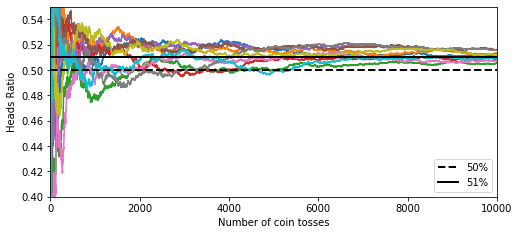

In [3]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000],[.5,.5], "k--", linewidth=2, label='50%')
plt.plot([0,10000],[.51,.51], "k-", linewidth=2, label='51%')
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads Ratio")
plt.legend(loc='lower right')
plt.axis([0,10000,0.40,0.55])
plt.show()


# plt.figure(figsize=(8,3.5))
# plt.plot(cumulative_heads_ratio)
# plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
# plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
# plt.xlabel("Number of coin tosses")
# plt.ylabel("Heads ratio")
# plt.legend(loc="lower right")
# plt.axis([0, 10000, 0.42, 0.58])
# save_fig("law_of_large_numbers_plot")
# plt.show()

In [4]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf),('rf', rnd_clf),('svc', svm_clf)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [6]:
## Voting classifier has highest accuracy score 
for clf in (voting_clf, rnd_clf, svm_clf, log_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)) 

VotingClassifier 0.904
RandomForestClassifier 0.896
SVC 0.896
LogisticRegression 0.864


## Bagging and Pasting

Use the same algorithm for every predictor but test it on different random subset of the training data 

Bagging: Short for bootrap aggregating, where sampling is performed with replacement 
Pasting: Sampling is performed without replacement


Can also sample features as well: 
- Using max_features and bootstrap_features args 
- Sampling training instances and features -> Random Patches Method
- Sampling features (but keeping all training instances) -> Random Subspaces method 
- When? When want more predictor diversity, trading more bias for a lower variance 

In [7]:
## Quick example 
bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500, # # of base estimators in ensemble 
    max_samples=100, # # of samples to draw from X to train each estimator 
    bootstrap=True, # default is already True.. 
    n_jobs=-1 # Number of jobs to run in //     
)

bag_clf.fit(X_train, y_train) 
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred) ## ~>0.9 

0.904

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape) # (100,100)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
    if contour: 
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2,y_pred, cmap=custom_cmap2, alpha=.8)
    plt.plot(X[:,0][y==0],X[:,1][y==0], 'yo',alpha=alpha)
    plt.plot(X[:,0][y==1],X[:,1][y==1], 'bs',alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [9]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

## Boosting 
### AdaBoost 

Overview of AdaBoost: 
- Algorithm first trains classifier and makes predictions on training set 
- Second classifier is trained on set with updated weights: the relative weight of misclassified training instances is increased

Main ideas of Adaboost: 
- Adaboost combines weak learners to make classifications, e.g. stumps
- Some stumps get more say (higher weight), the predictor weight is different than insstance weights!
    - Predictor weight(j) = eta * log(1-rj / rj) (e.g. amount of say of predictor) 
    - With rj: weight error rate of the jth predictor = sum(instance weight where instance misclassified) / sum(instance weights) 
    - Instance weight of misclassified obs is then updated: New weight = old weight * e(predictor weight) (then normalize all weights to sum to 1)  
- Each stump is made by taking errors of previous stump (e.g. weigh missclassified errors more heavily, e.g. with weighted Gini or by upsampling missclassified instances) 

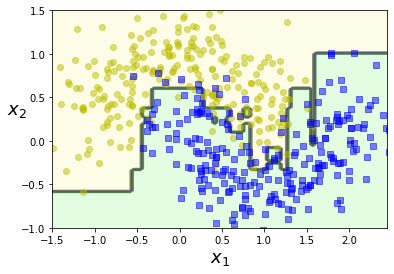

In [10]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=.5, random_state=42)

ada_clf.fit(X_train, y_train) 

plot_decision_boundary(ada_clf, X, y)


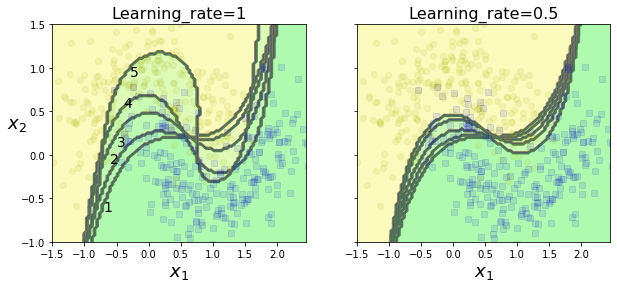

In [11]:
m = len(X_train)


fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0,1),(1,.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5): 
        svm_clf = SVC(kernel='rbf', C=.05, gamma='scale', random_state=42)
        svm_clf.fit(X_train,y_train, sample_weight=sample_weights) # matrix of 1s at first
        y_pred = svm_clf.predict(X_train) ## Not X_test! remember looking at misclassifications
        sample_weights[y_pred != y_train] *= (1 + learning_rate) ## y_pred != y_train
        plot_decision_boundary(svm_clf,X,y,alpha=.02)
        plt.title("Learning_rate={}".format(learning_rate),fontsize=16)
    if subplot==0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")
        
plt.show()

## Gradient Boosting

- Models (typically weak learners) are trained sequentially but the key difference between AdaBoost and Gradient Boosting: —> Gradient Boosting (GB) does not readjust weights of instances between each model.  Instead, the algorithm tries to fit the new predictor on the residual errors made by the previous predictor  


Stochastic Gradient Boosting is using Gradient Boosting over only a random subsample of the training data for each iteration (using the subsample argument) -> higher bias lower variance 


In [13]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X,y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X,y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X,y3)

X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [14]:
def plot_predictions(regressors, X, y, axes=[-0.5, 0.5, -0.1, 0.8], label=None, style='r-' ,data_style = 'b.', data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1,1)) for regressor in regressors)
    plt.plot(X[:,0], y, data_style, label = data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc='upper center', fontsize=16)
    plt.axis(axes)


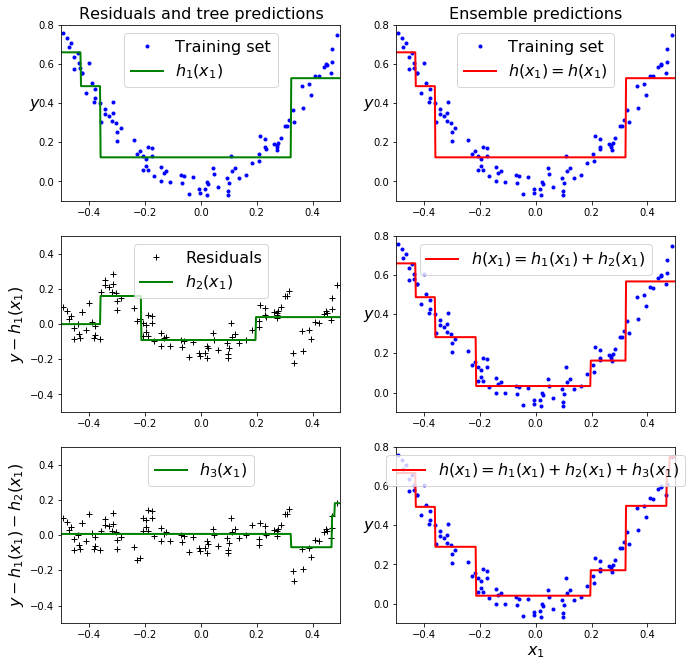

In [15]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, label="$h_1(x_1)$", style = 'g-', data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, label="$h(x_1) = h(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5],
                 label="$h_2(x_1)$", style = 'g-', data_style = 'k+', data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1,tree_reg2], X, y,
                 label="$h(x_1)=h_1(x_1)+h_2(x_1)$", style = 'r-', data_style = 'b.')
plt.ylabel("$y$", fontsize=16, rotation = 0)


plt.subplot(325)
plot_predictions([tree_reg3], X, y3,  axes=[-0.5, 0.5, -0.5, 0.5],
                label='$h_3(x_1)$', data_style='k+', style='g-')
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1,tree_reg2,tree_reg3], X, y,
                label="$h(x_1)=h_1(x_1)+h_2(x_1)+h_3(x_1)$", style = 'r-', data_style='b.')
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

### Selecting the optimal number of trees with Gradient Boosting

Two options: 
- To find optimal number of trees
- Train the model with a high number of iterations, and then select the # of trees where the performance was optimal (i.e. validation error is lowest, plot error vs. iterations (or number of trees))
    - Here, use staged_predict() (from GradientBoostingRegressor class) - it returns an iterator over the predictions made by the ensemble at each stage of training  
- Use warm_start = True to use early stopping. Instead of training large number of trees and then looking back at optimal number, keep track of validation error and if val error does not decrease over x iterations, stop training 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_pred, y_val) for y_pred 
             in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1
min_error = np.min(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=43, random_state=42)

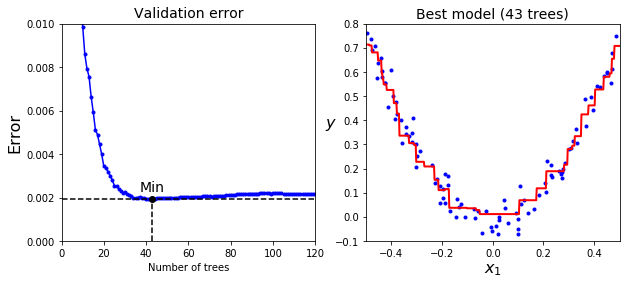

In [51]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
# n_trees = np.arange(0,121)
# plt.plot(n_trees, errors[:121], 'b-')
plt.plot(errors, 'b.-') ## @note: style '.-' to plot both scatter + line through points
plt.plot([bst_n_estimators, bst_n_estimators], [0,min_error], 'k--')
plt.plot([0,120], [min_error, min_error], 'k--')
plt.plot(bst_n_estimators, min_error, 'ko')
plt.text(bst_n_estimators, min_error * 1.2, "Min", ha="center", fontsize=14)
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)
plt.axis([0,120,0,0.010])

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()


In [54]:
## Alternatively, keep track of validation error and stop after x consecutive runs 
## of non-decreasing val error 

## @note: warm_start makes scikit-learn keep the exisiting trees when the fit() 
## .. method is called -> enables INCREMENTAL TRAINING 

gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0 

for n_estimators in range(1,120): 
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train,y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error: 
        min_val_error = val_error
        error_going_up = 0 
    else: 
        error_going_up += 1 
        if error_going_up == 5: 
            break # Early stop 

print(gbrt.n_estimators)

48
